In [1]:
# Import Libraries and file

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df_ords_final = pd.read_pickle(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Data/Prepared Data/orders_products_customers.pkl')

In [4]:
df_ords_final.head(10)

,user_id,first_name,last_name,sex,state,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,11.40,High spender,14.0,Regular customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,11.40,High spender,14.0,Regular customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,11.40,High spender,14.0,Regular customer,both
9,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Regularly days,Most orders,5,New customer,9.65,Low spender,28.0,Non-frequent customer,both


In [5]:
#Checking
df_ords_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   user_id                1000000 non-null  int64   
 1   first_name             1000000 non-null  object  
 2   last_name              1000000 non-null  object  
 3   sex                    1000000 non-null  object  
 4   state                  1000000 non-null  object  
 5   age                    1000000 non-null  int64   
 6   date_joined            1000000 non-null  object  
 7   n_dependants           1000000 non-null  int64   
 8   fam_status             1000000 non-null  object  
 9   income                 1000000 non-null  int64   
 10  order_id               1000000 non-null  int64   
 11  order_number           1000000 non-null  int64   
 12  orders_day_of_week     1000000 non-null  int64   
 13  order_hour_of_day      1000000 non-null  int64   
 14  day

In [6]:
# Creating a Bar Chart for Days of the week with highest orders

<Axes: >

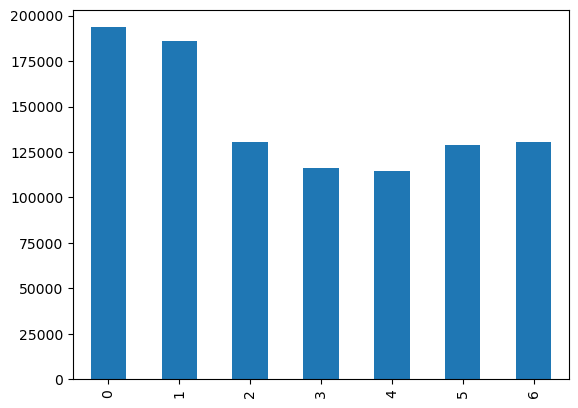

In [7]:
df_ords_final['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Creating Frequency prices Histogram

<Axes: ylabel='Frequency'>

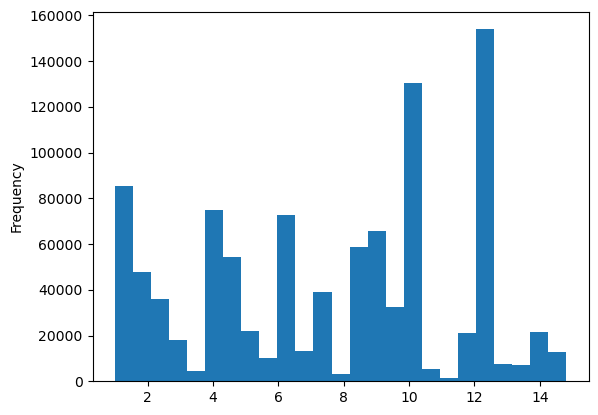

In [9]:
df_ords_final['prices'].plot.hist(bins = 25)

In [10]:
# Creating Frequency prices Scartterplot chart

<Axes: xlabel='prices', ylabel='prices'>

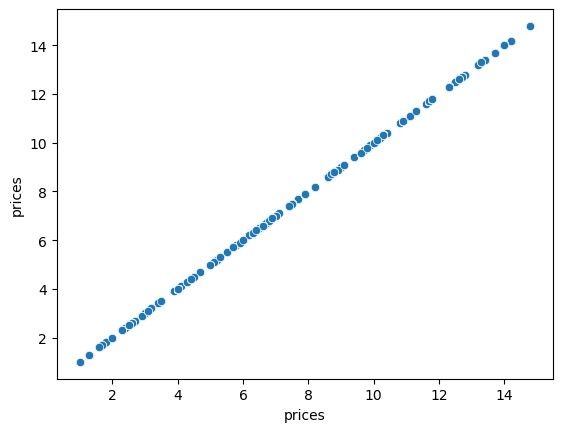

In [11]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_final)

In [12]:
# Creating Histogram for Hour of the day

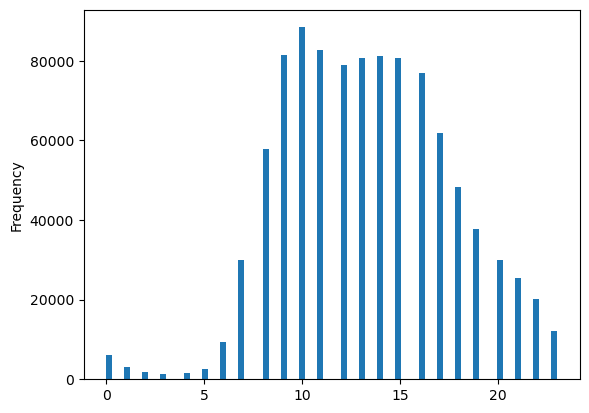

In [13]:
Bar_hour_frequency = df_ords_final['order_hour_of_day'].plot.hist(bins = 75)

We can conclude that the 6 am starts the rise in orders, reaching its peak at 10 am, and continues its rise until 4 pm, thus starting the decline in orders until 11 pm. By analyzing the chart we can identify that the orders rise and fall gradually throughout the day.

In [14]:
# Creating a bar chart for Loyalty Flag

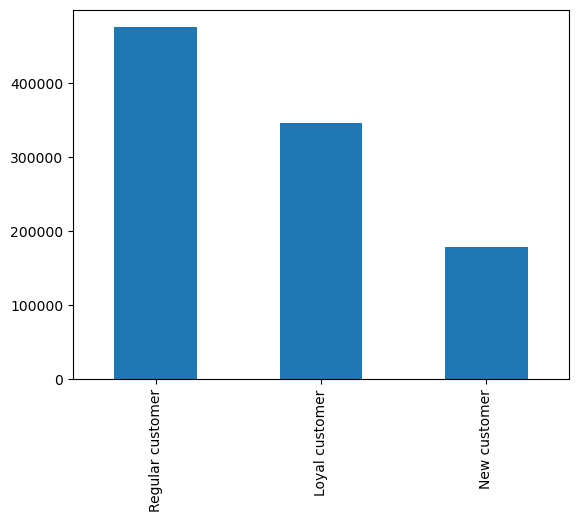

In [15]:
bar_loyalty = df_ords_final['loyalty_flag'].value_counts().plot.bar()

In [16]:
#create random sample of data to create this line chart
np.random.seed(4)
dev = np.random.rand(len(df_ords_final)) <= 0.7

In [17]:
#create the samples big and small
big = df_ords_final[dev]
small = df_ords_final[~dev]

In [18]:
len(df_ords_final)

1000000

In [19]:
len(big)+len(small)

1000000

In [20]:
# Plot line with small sampling - 30%

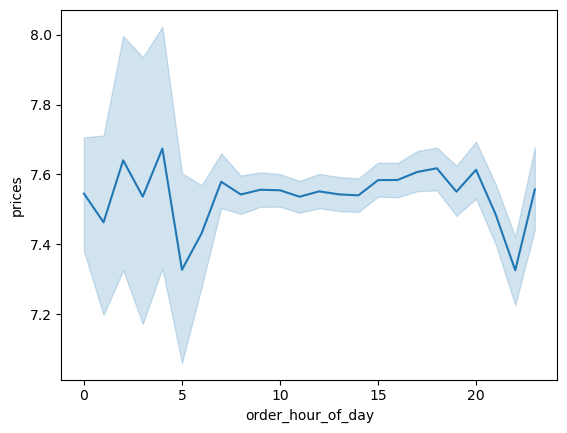

In [21]:
line_plot_small = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')

In [22]:
# Plot line with big sampling - 70%

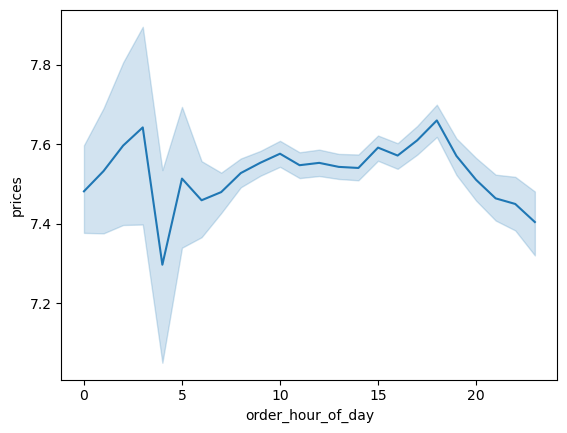

In [23]:
line_plot_big = sns.lineplot(data = big, x = 'order_hour_of_day',y = 'prices')

when analyzing the graphs we see a small variation in the prices in the morning.

In [24]:
# Creating a line plot to accurace the connection between age and family

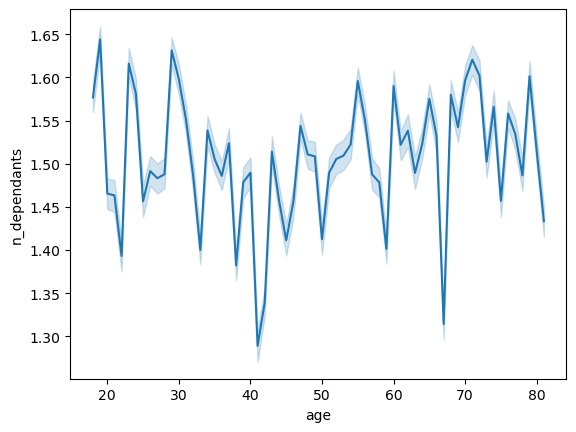

In [25]:
line_age_dependants = sns.lineplot(data = df_ords_final, x = 'age',y = 'n_dependants')

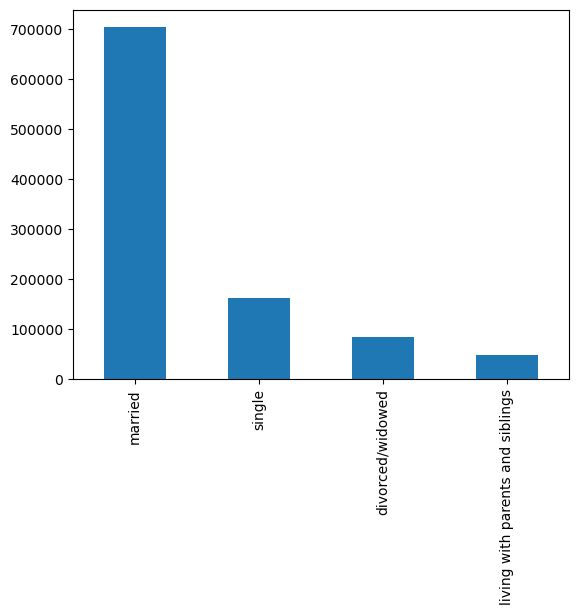

In [26]:
bar_status = df_ords_final['fam_status'].value_counts().plot.bar()

We can conclude that there is no connection between number of dependents and age, but as we can see from the bar chart above, the largest number of clients are married.

In [27]:
# Creating Scatterplot to accurace age and income

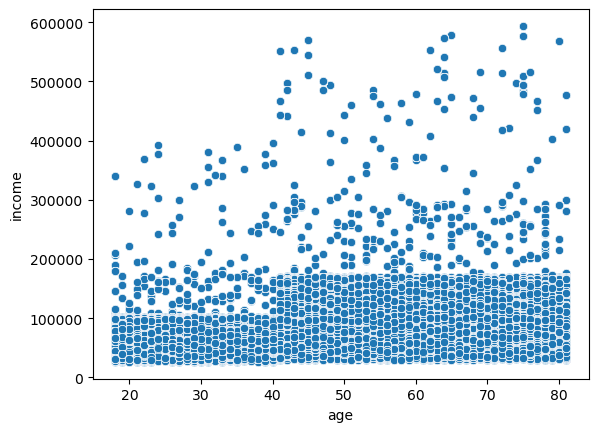

In [28]:
scatter_plot_age = sns.scatterplot(x = 'age', y = 'income',data = df_ords_final)

We see in the graph that 40 and 60 to 80 year olds have the highest income rates.

In [29]:
# Export Graphs as PNG

In [30]:
Bar_hour_frequency.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/Bar_hour_frequency.png')

In [31]:
bar_loyalty.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/Bar_loyalty.png')

In [32]:
line_plot_small.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/line_plot_small.png')

In [33]:
line_plot_big.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/line_plot_big.png')

In [34]:
line_age_dependants.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/line_age_dependants.png')

In [35]:
bar_status.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/bar_status.png')

In [36]:
scatter_plot_age.figure.savefig(r'/Users/pedropaulo/Desktop/Tasks CF/Instacart Basket Analysis/Analysis/Visualizations/scatter_plot_age.png')